In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from collections import Counter
import re

In [2]:
df = pd.read_csv('indian_properties_cleaned_v1.csv')

In [3]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,experion the heartsong,sector 108,1.68,8387.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up...,3,3,3+,"servant room,study room",4.0,East,1 to 5 Year Old,"['Galleria 108 Mall', 'Dwarka Expressway', 'Ce...","['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Power Back-up', 'Fe..."
1,flat,emaar digihomes,sector 62,2.45,16000.0,1531.0,Built Up area: 1200 (111.48 sq.m.)Carpet area:...,2,2,2,study room,7.0,North-East,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'Omaxe Gurgaon ...","['1 Water Purifier', '2 Fan', '1 Fridge', '1 E...","['Centrally Air Conditioned', 'Water purifier'..."
2,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8,7,3+,"pooja room,study room,servant room,others",3.0,East,5 to 10 Year Old,"['Huda city centre metro station', 'New Life C...","['8 Wardrobe', '10 Fan', '1 Exhaust Fan', '10 ...","['Private Garden / Terrace', 'Water purifier',..."
3,house,independent,sector 38,3.90,21242.0,1836.0,Plot area 204(170.57 sq.m.),6,6,3+,"pooja room,study room,servant room",3.0,North-East,5 to 10 Year Old,"['Rajiv Chowk Mosque', 'Icici bank ATM', 'Stat...",NaN,"['Feng Shui / Vaastu Compliant', 'Maintenance ..."
4,house,independent,sector 27,4.25,31481.0,1350.0,Plot area 163(136.29 sq.m.)Built Up area: 161 ...,5,5,3+,"pooja room,servant room",3.0,East,1 to 5 Year Old,"['Dlf phase 1 metro station', 'Sector 42-43 me...","['10 Wardrobe', '1 Water Purifier', '7 Fan', '...","['Feng Shui / Vaastu Compliant', 'Private Gard..."


In [4]:
df.shape

(3803, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3803 non-null   object 
 1   society          3802 non-null   object 
 2   sector           3803 non-null   object 
 3   price            3785 non-null   float64
 4   price_per_sqft   3785 non-null   float64
 5   area             3785 non-null   float64
 6   areaWithType     3803 non-null   object 
 7   bedRoom          3803 non-null   int64  
 8   bathroom         3803 non-null   int64  
 9   balcony          3803 non-null   object 
 10  additionalRoom   3803 non-null   object 
 11  floorNum         3784 non-null   float64
 12  facing           2698 non-null   object 
 13  agePossession    3802 non-null   object 
 14  nearbyLocations  3626 non-null   object 
 15  furnishDetails   2822 non-null   object 
 16  features         3168 non-null   object 
dtypes: float64(4),

In [6]:
df.duplicated().sum()

122

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,experion the heartsong,sector 108,1.68,8387.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up...,3,3,3+,"servant room,study room",4.0,East,1 to 5 Year Old,"['Galleria 108 Mall', 'Dwarka Expressway', 'Ce...","['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Power Back-up', 'Fe..."
1,flat,emaar digihomes,sector 62,2.45,16000.0,1531.0,Built Up area: 1200 (111.48 sq.m.)Carpet area:...,2,2,2,study room,7.0,North-East,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'Omaxe Gurgaon ...","['1 Water Purifier', '2 Fan', '1 Fridge', '1 E...","['Centrally Air Conditioned', 'Water purifier'..."
2,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8,7,3+,"pooja room,study room,servant room,others",3.0,East,5 to 10 Year Old,"['Huda city centre metro station', 'New Life C...","['8 Wardrobe', '10 Fan', '1 Exhaust Fan', '10 ...","['Private Garden / Terrace', 'Water purifier',..."
3,house,independent,sector 38,3.90,21242.0,1836.0,Plot area 204(170.57 sq.m.),6,6,3+,"pooja room,study room,servant room",3.0,North-East,5 to 10 Year Old,"['Rajiv Chowk Mosque', 'Icici bank ATM', 'Stat...",NaN,"['Feng Shui / Vaastu Compliant', 'Maintenance ..."
4,house,independent,sector 27,4.25,31481.0,1350.0,Plot area 163(136.29 sq.m.)Built Up area: 161 ...,5,5,3+,"pooja room,servant room",3.0,East,1 to 5 Year Old,"['Dlf phase 1 metro station', 'Sector 42-43 me...","['10 Wardrobe', '1 Water Purifier', '7 Fan', '...","['Feng Shui / Vaastu Compliant', 'Private Gard..."


### property_type

<Axes: ylabel='property_type'>

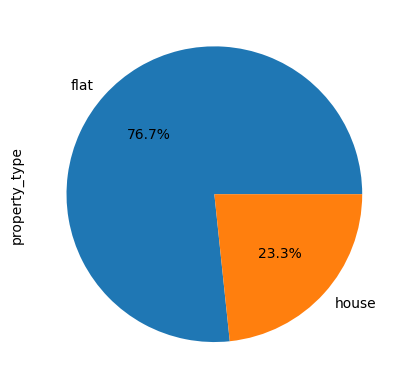

In [9]:
df['property_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# Observations
* Flats are in majority(75 percent) and there are less number of houses(~25 percent)
* No missing values


### society

In [10]:
df['society'].value_counts().shape

(676,)

In [11]:
society_counts = df['society'].value_counts()

In [12]:
# Summary statistics for society attribute
print("Number of Unique Societies:", len(df['society'].unique()))
print("Most Common Society:", df['society'].mode().values[0])
print("Frequency of Most Common Society:", df['society'].value_counts().max())

Number of Unique Societies: 677
Most Common Society: independent
Frequency of Most Common Society: 486


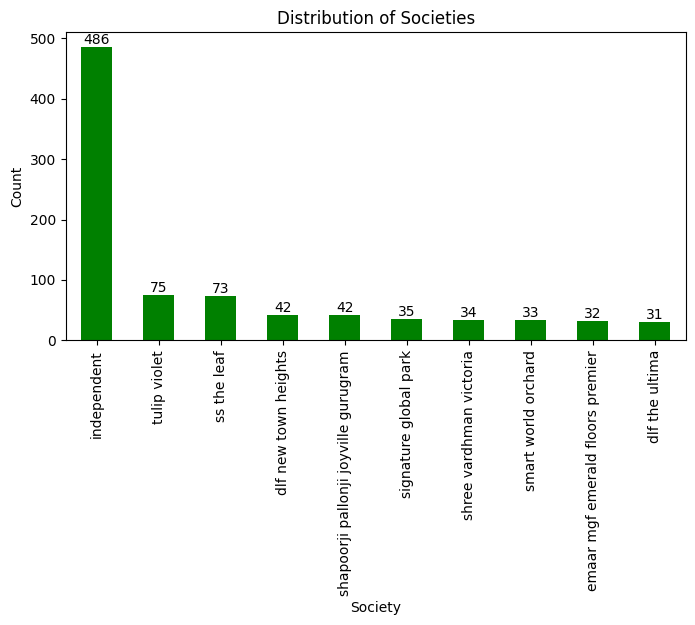

In [13]:
ax = df['society'].value_counts().head(10).plot(kind='bar', figsize=(8, 4), color = 'green')
for i, v in enumerate(society_counts.head(10)):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')
plt.title('Distribution of Societies')
plt.xlabel('Society')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='society'>

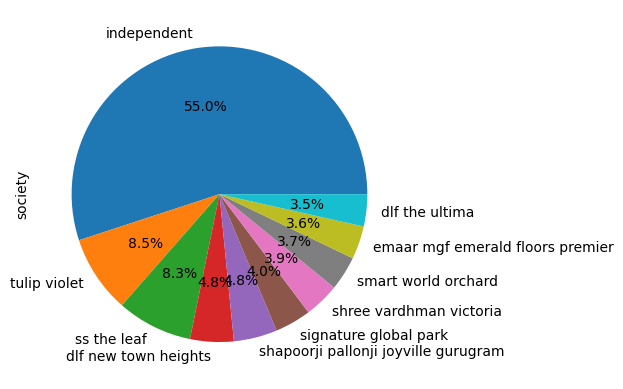

In [14]:
df['society'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%')

In [15]:
# average price for each society
society_mean_price = df.groupby('society')['price'].mean()
print(society_mean_price.sort_values(ascending=False))

society
arjun marg/ sector- 26 phase- 1/ golf course road    31.500000
emaar the palm springs                               19.000000
adani brahma samsara                                 18.020000
dlf alameda                                          17.000000
dlf city plots                                       16.072727
                                                       ...    
city shri ram apartments 1                            0.220000
shreeram apartment ii                                 0.210000
ashiana apartment                                     0.160000
dlf city plot phase 3                                      NaN
signature global orchard avenue 2                          NaN
Name: price, Length: 676, dtype: float64


In [16]:
# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}

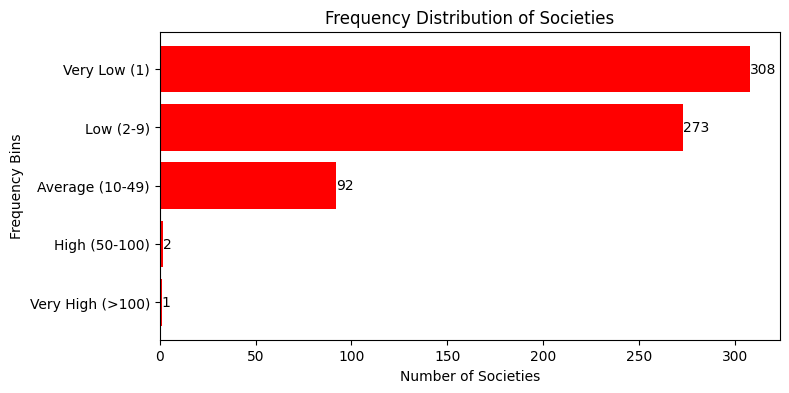

In [17]:
plt.figure(figsize=(8, 4))
plt.barh(list(frequency_bins.keys()), list(frequency_bins.values()), color='red')

for index, value in enumerate(frequency_bins.values()):
    plt.text(value, index, str(value), ha='left', va='center', color='black')
plt.title('Frequency Distribution of Societies')
plt.xlabel('Number of Societies')
plt.ylabel('Frequency Bins')
plt.show()

In [18]:
df['society'].isnull().sum()

1

In [19]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
1372,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,not available,NaN,NaN,Under Construction,NaN,[],NaN


#### Observations

- There are 677 societies.
- Independent houses are more common than any other in the society. Below are the details of the frequency of different societies.
    - Very High (>100): Only 1 society has more than 100 listings.
    - High (50-100): 2 societies have between 50 to 100 listings.
    - Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
    - Low (2-9): 273 societies have between 2 to 9 listings.
    - Very Low (1): A significant number, 308 societies, have only 1 listing.
- 1 missing value

### sector

In [20]:
# unique sectors
df['sector'].value_counts().shape

(115,)

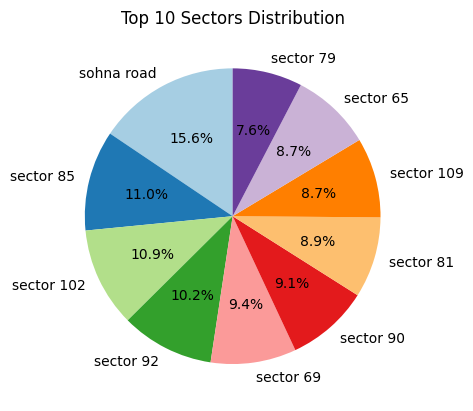

In [21]:
# top 10 sectors
top_10_sectors = df['sector'].value_counts().head(10)
plt.pie(top_10_sectors, labels=top_10_sectors.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired(range(len(top_10_sectors))))
plt.title('Top 10 Sectors Distribution')
plt.show()

In [22]:
# Summary statistics for society attribute
print("Number of Unique Sectors:", len(df['sector'].unique()))
print("Most Common Sector:", df['sector'].mode().values[0])
print("Houses in Most Common Sector:", df['sector'].value_counts().max())

Number of Unique Sectors: 115
Most Common Sector: sohna road
Houses in Most Common Sector: 153


In [23]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

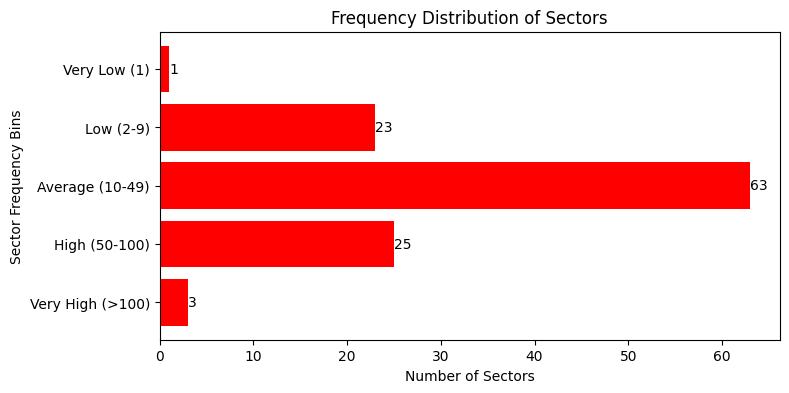

In [24]:
plt.figure(figsize=(8, 4))
plt.barh(list(sector_frequency_bins.keys()), list(sector_frequency_bins.values()), color='red')

for index, value in enumerate(sector_frequency_bins.values()):
    plt.text(value, index, str(value), ha='left', va='center', color='black')
plt.title('Frequency Distribution of Sectors')
plt.xlabel('Number of Sectors')
plt.ylabel('Sector Frequency Bins')
plt.show()

#### Observations

- There are a total of 115 unique sectors in the dataset.
- Frequency distribution of sectors:
    - Very High (>100): 3 sectors have more than 100 listings.
    - High (50-100): 25 sectors have between 50 to 100 listings.
    - Average (10-49): A majority, 63 sectors, fall in this range with 10 to 49 listings each.
    - Low (2-9): 23 sectors have between 2 to 9 listings.
    - Very Low (1): Interestingly, there are no sectors with only 1 listing.

### Price

In [25]:
df['price'].isnull().sum()

17

In [26]:
df['price'].describe()

count    3664.000000
mean        2.533248
std         2.979058
min         0.070000
25%         0.950000
50%         1.525000
75%         2.750000
max        31.500000
Name: price, dtype: float64

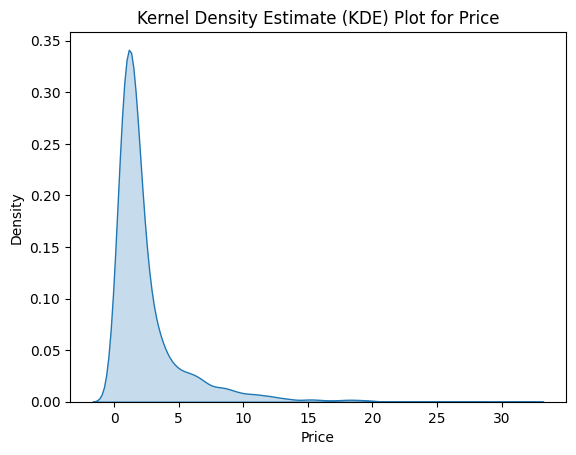

In [27]:
sns.kdeplot(df['price'], fill=True)
plt.title('Kernel Density Estimate (KDE) Plot for Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

- Descriptive Statistics:

    - Count: There are 3,664 non-missing price entries.
    - Mean Price: The average price is approximately 2.53 crores.
    - Median Price: The median (or 50th percentile) price is 1.52 crores.
    - Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices.
    - Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
    - IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.

- Missing Values: There are 17 missing values in the price column.

In [28]:
# Skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

3.2811592590294394 14.95329398708748


**Skewness**: The price distribution has a skewness of approximately 3.28, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

**Kurtosis**: The kurtosis value is approximately 14.95. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [29]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

In [30]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

In [31]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.7500000000000002 5.45


In [32]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(425, 17)

In [33]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

Outliers Analysis (using IQR method):

- Based on the IQR method, there are 432 properties considered as outliers.
- These outliers have an average price of approximately 9.19 crores.
- The range for these outliers is from 5.35 crores to 31.5 crores.

<Axes: ylabel='price'>

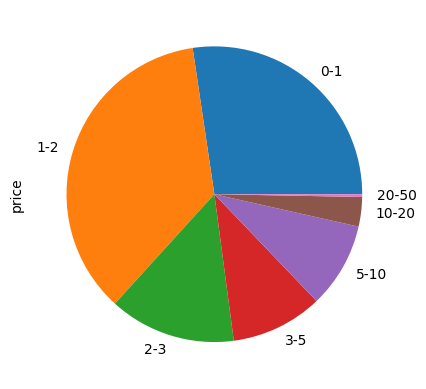

In [34]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='pie')

- The majority of properties are priced in the "0-1 crores" and "1-2 crores" ranges.
- There's a significant drop in the number of properties priced above "10 crores."

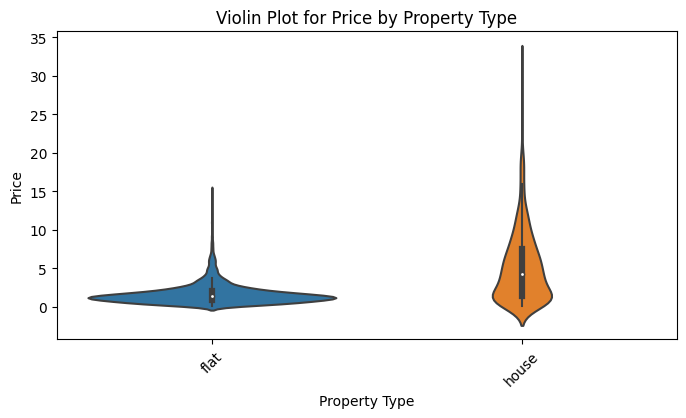

In [35]:
plt.figure(figsize=(8, 4))
sns.violinplot(x='property_type', y='price', data=df)
plt.title('Violin Plot for Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


**Violin Shape**:
The main body of the violin represents the kernel density estimate of the data distribution. It provides information about the probability density at different values of the variable. A wider section indicates a higher probability density.

**White Dot or Line**:
The white dot or line inside the violin represents the median of the data. It gives you an idea of the central tendency of the distribution.

**Box Plots**:
Typically, a box plot is embedded within the violin plot. The box part represents the interquartile range (IQR) of the data. The horizontal line inside the box is the median. The whiskers extend to the minimum and maximum values within 1.5 times the IQR.

**Width Variation**:
The width of the violin plot can vary at different points along the x-axis. Wider sections indicate higher variability in the data at those points.

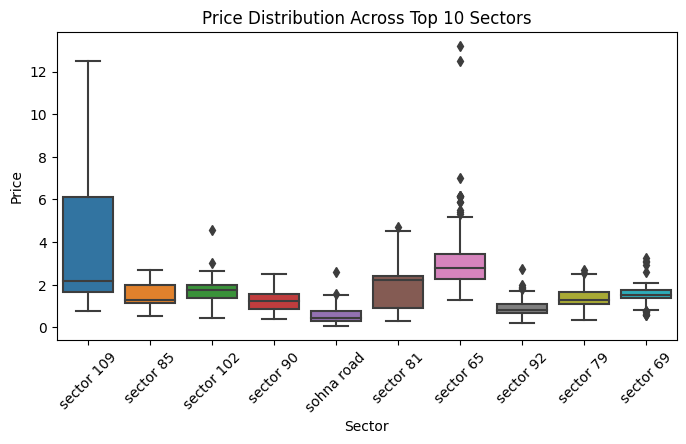

In [36]:
top_10_sectors = df['sector'].value_counts().nlargest(10).index
df_top_10_sectors = df[df['sector'].isin(top_10_sectors)]

plt.figure(figsize=(8, 4))
sns.boxplot(x='sector', y='price', data=df_top_10_sectors)
plt.title('Price Distribution Across Top 10 Sectors')
plt.xlabel('Sector')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

**Box**:
The box in the plot represents the interquartile range (IQR), which is the range between the first quartile (Q1) and the third quartile (Q3). The height of the box indicates the variability of the middle 50% of the data.

**Line Inside the Box**:
The line inside the box represents the median of the data. It is the value that separates the lower 50% of the data from the upper 50%.

**Whiskers**:
The whiskers are lines extending from the box. They indicate the range of the data outside the interquartile range. By default, they typically extend to 1.5 times the interquartile range from the first and third quartiles. Any points beyond the whiskers are considered outliers and plotted individually.

**Outliers**:
Individual points beyond the whiskers are considered outliers. They are plotted as individual points.

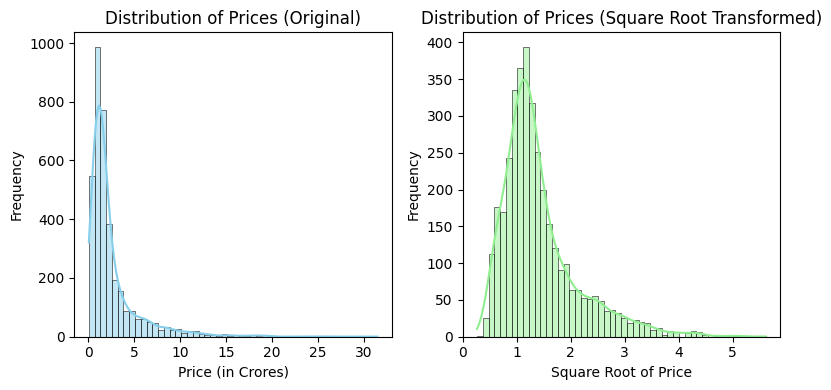

In [37]:
plt.figure(figsize=(8, 4))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Square root transformation
plt.subplot(1, 2, 2)
sns.histplot(np.sqrt(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Square Root Transformed)')
plt.xlabel('Square Root of Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### price_per_sqft

In [38]:
df['price_per_sqft'].isnull().sum()

17

In [39]:
df['price_per_sqft'].describe()

count      3664.000000
mean      13895.281114
std       23197.757961
min           4.000000
25%        6818.000000
50%        9022.000000
75%       13888.250000
max      600000.000000
Name: price_per_sqft, dtype: float64

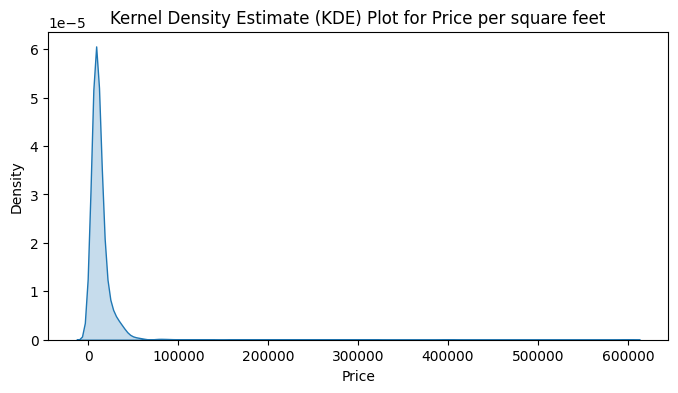

In [40]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df['price_per_sqft'], fill=True)
plt.title('Kernel Density Estimate (KDE) Plot for Price per square feet')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

Most properties have a price_per_sqft ranging between approximately ₹0 and ₹40,000. There is a significant concentration in the lower range, with a few properties having exceptionally high price_per_sqft.

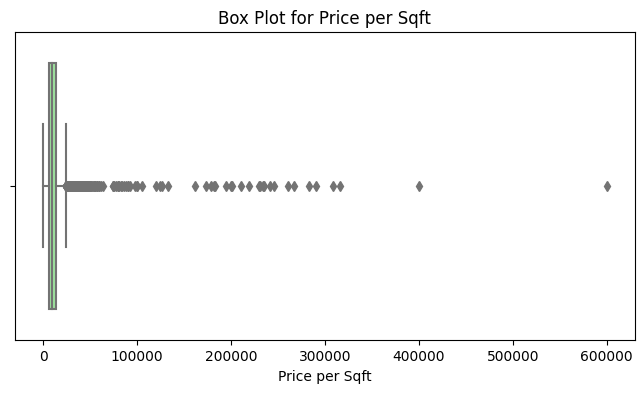

In [41]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['price_per_sqft'], color='lightgreen')
plt.title('Box Plot for Price per Sqft')
plt.xlabel('Price per Sqft')
plt.show()

The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers

#### Observations

- Potential Outliers
- Right Skewed
- 17 missing values

### bedRoom

In [42]:
df['bedRoom'].isnull().sum()

0

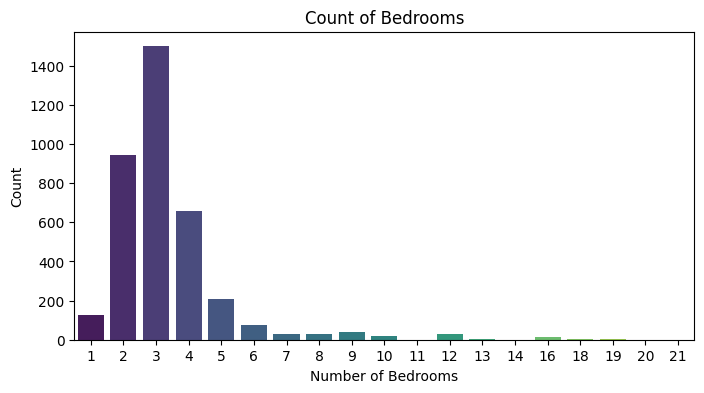

In [43]:
plt.figure(figsize=(8, 4))
sns.countplot(x='bedRoom', data=df, palette='viridis')
plt.title('Count of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='bedRoom'>

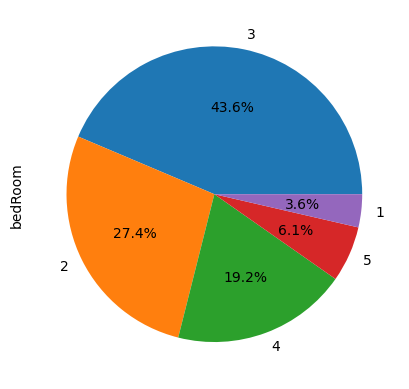

In [44]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%1.1f%%')

### bathroom

In [45]:
df['bathroom'].isnull().sum()

0

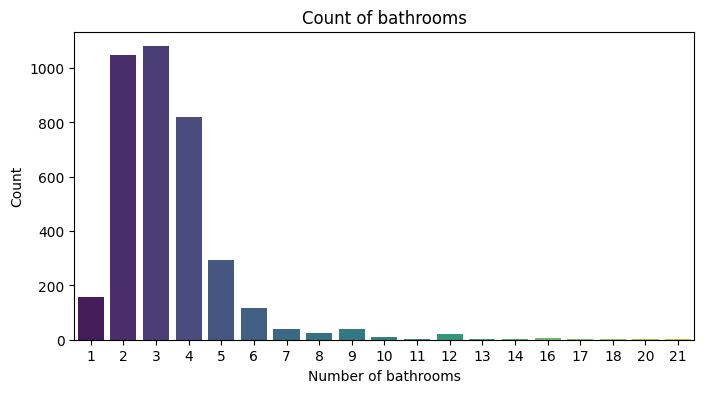

In [46]:
plt.figure(figsize=(8, 4))
sns.countplot(x='bathroom', data=df, palette='viridis')
plt.title('Count of bathrooms')
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='bathroom'>

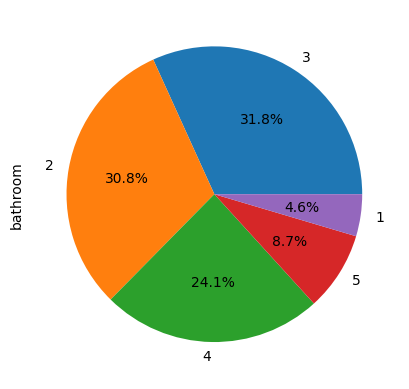

In [47]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%1.1f%%')

### balcony

In [48]:
df['balcony'].isnull().sum()

0

<Axes: ylabel='balcony'>

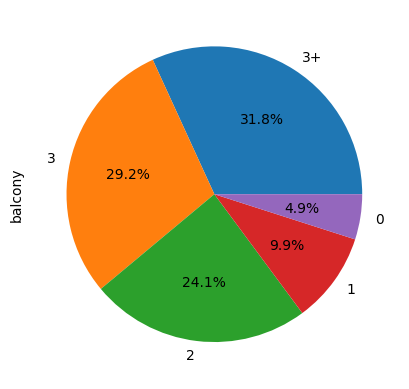

In [49]:
df['balcony'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Floor number

In [51]:
df.iloc[:,10:].head()

,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,"servant room,study room",4.0,East,1 to 5 Year Old,"['Galleria 108 Mall', 'Dwarka Expressway', 'Ce...","['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Power Back-up', 'Fe..."
1,study room,7.0,North-East,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'Omaxe Gurgaon ...","['1 Water Purifier', '2 Fan', '1 Fridge', '1 E...","['Centrally Air Conditioned', 'Water purifier'..."
2,"pooja room,study room,servant room,others",3.0,East,5 to 10 Year Old,"['Huda city centre metro station', 'New Life C...","['8 Wardrobe', '10 Fan', '1 Exhaust Fan', '10 ...","['Private Garden / Terrace', 'Water purifier',..."
3,"pooja room,study room,servant room",3.0,North-East,5 to 10 Year Old,"['Rajiv Chowk Mosque', 'Icici bank ATM', 'Stat...",NaN,"['Feng Shui / Vaastu Compliant', 'Maintenance ..."
4,"pooja room,servant room",3.0,East,1 to 5 Year Old,"['Dlf phase 1 metro station', 'Sector 42-43 me...","['10 Wardrobe', '1 Water Purifier', '7 Fan', '...","['Feng Shui / Vaastu Compliant', 'Private Gard..."


In [52]:
df['floorNum'].isnull().sum()

19

In [53]:
df['floorNum'].describe()

count    3662.000000
mean        6.798471
std         6.016940
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: >

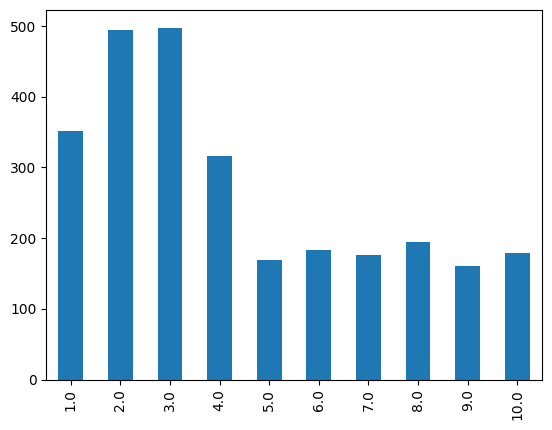

In [54]:
df['floorNum'].value_counts().head(10).sort_index().plot(kind='bar')

<Axes: >

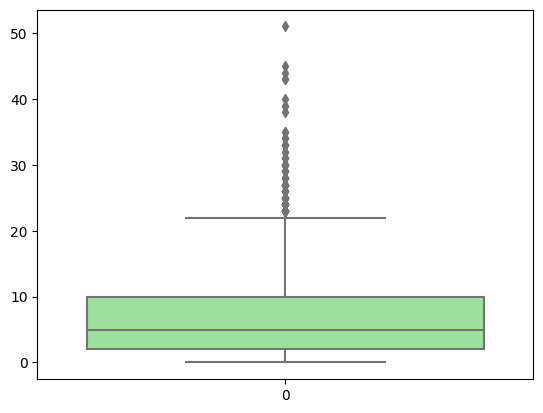

In [55]:
sns.boxplot(df['floorNum'], color='lightgreen')

- The majority of the properties lie between the ground floor (0) and the 25th floor.
- Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
- There are a few properties located at higher floors, but their frequency is much lower.
- The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
- Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.

### facing

In [56]:
df['facing'].isnull().sum()

1048

In [57]:
df['facing'].fillna('NA',inplace=True)

In [58]:
df['facing'].value_counts()

NA            1048
East           624
North-East     623
North          387
West           249
South          231
North-West     193
South-East     173
South-West     153
Name: facing, dtype: int64

### agePossession

In [59]:
df['agePossession'].isnull().sum()

1

In [60]:
df['agePossession'].value_counts()

1 to 5 Year Old       1646
5 to 10 Year Old       563
0 to 1 Year Old        503
undefined              307
10+ Year Old           303
Under Construction      88
Within 6 months         67
Within 3 months         24
Dec 2023                20
By 2023                 17
By 2024                 16
Dec 2024                15
Mar 2024                12
Dec 2025                 7
Jan 2024                 7
Jun 2024                 7
Aug 2023                 6
Oct 2024                 6
Nov 2023                 5
Aug 2024                 4
By 2025                  4
Oct 2023                 4
Sep 2023                 4
Nov 2024                 3
Jul 2024                 3
May 2024                 3
Feb 2024                 3
Jan 2025                 3
Mar 2025                 2
Aug 2025                 2
Jul 2025                 2
Jan 2026                 2
Sep 2025                 2
Dec 2026                 2
By 2027                  2
Apr 2026                 2
Jul 2027                 2
J

# Nearby locations

In [61]:
df_eda_nearby = df.copy()

In [62]:
df_eda_nearby['nearbyLocations'].isnull().sum()

170

In [63]:
df_eda_nearby['nearbyLocations'] = df_eda_nearby['nearbyLocations'].str.replace(r'\[\]', '')

<ipython-input-63-49ba2bfc1b4c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_eda_nearby['nearbyLocations'] = df_eda_nearby['nearbyLocations'].str.replace(r'\[\]', '')


In [64]:
df_eda_nearby['nearbyLocations'] = df_eda_nearby['nearbyLocations'].replace('', np.nan)

In [65]:
df_eda_nearby['nearbyLocations'] = df_eda_nearby['nearbyLocations'].str.strip('[]')

In [66]:
df_eda_nearby['nearbyLocations'].fillna('NA',inplace=True)

In [67]:
df_eda_nearby['nearbyLocations'] = df_eda_nearby['nearbyLocations'].apply(lambda x: x.strip('""').split(', '))

In [68]:
#df_eda_furniture['furnishDetails'] = df_eda_furniture['furnishDetails'].str.replace(r'^\d{2,3}', '')
df_exploded = df_eda_nearby.explode('nearbyLocations')
df_exploded['nearbyLocations'] = df_exploded['nearbyLocations'].apply(lambda x: re.sub(r'[\d\s]+', '', x))
top_locations = df_exploded['nearbyLocations'].value_counts()

# Create a DataFrame for the top features
top_locations_df = pd.DataFrame({'Furniture': top_locations.index, 'Count': top_locations.values})


filtered_df_available = top_locations_df[~(top_locations_df['Furniture'].str.contains(r'\bNo')) & ~(top_locations_df['Furniture']=='NA')]
filtered_df_available.reset_index().drop(columns=['index']).head(10)

,Furniture,Count
0,'IndiraGandhiInternationalAirport',1049
1,'Hdfcbank',1023
2,'DwarkaExpressway',677
3,'IcicibankATM',530
4,'PizzaHut',495
5,'SkyJumperTrampolinePark',486
6,'Icicibank',480
7,'IndiraGandhiIntlAirport',448
8,'Gurgaonrailwaystation',448
9,'Axisbank',394


# Furniture Details

In [69]:
df_eda_furniture = df.copy()

In [70]:
df_eda_furniture['furnishDetails'].isnull().sum()

946

In [71]:
df_eda_furniture['furnishDetails'] = df_eda_furniture['furnishDetails'].str.replace(r'\[\]', '')

<ipython-input-71-012240bfa2b2>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_eda_furniture['furnishDetails'] = df_eda_furniture['furnishDetails'].str.replace(r'\[\]', '')


In [72]:
df_eda_furniture['furnishDetails'] = df_eda_furniture['furnishDetails'].replace('', np.nan)

In [73]:
df_eda_furniture['furnishDetails'] = df_eda_furniture['furnishDetails'].str.strip('[]')

In [74]:
df_eda_furniture['furnishDetails'].fillna('NA',inplace=True)

In [75]:
df_eda_furniture['furnishDetails'] = df_eda_furniture['furnishDetails'].apply(lambda x: x.strip('""').split(', '))

In [76]:
#df_eda_furniture['furnishDetails'] = df_eda_furniture['furnishDetails'].str.replace(r'^\d{2,3}', '')
df_exploded = df_eda_furniture.explode('furnishDetails')
df_exploded['furnishDetails'] = df_exploded['furnishDetails'].apply(lambda x: re.sub(r'[\d\s]+', '', x))
top_furnitures = df_exploded['furnishDetails'].value_counts()

# Create a DataFrame for the top features
top_furnitures_df = pd.DataFrame({'Furniture': top_furnitures.index, 'Count': top_furnitures.values})


filtered_df_available = top_furnitures_df[~(top_furnitures_df['Furniture'].str.contains(r'\bNo')) & ~(top_furnitures_df['Furniture']=='NA')]
filtered_df_available.reset_index().drop(columns=['index']).head(10)

,Furniture,Count
0,'Light',1878
1,'Fan',1592
2,'ModularKitchen',1486
3,'Wardrobe',1410
4,'ExhaustFan',1220
5,'Geyser',1202
6,'Chimney',1146
7,'AC',1125
8,'Curtains',537
9,'Stove',471


In [77]:
filtered_df_notavailable = top_furnitures_df[top_furnitures_df['Furniture'].str.contains(r'\bNo')]
filtered_df_notavailable.reset_index().drop(columns=['index']).head(10)

,Furniture,Count
0,'NoTV',2216
1,'NoDiningTable',2203
2,'NoBed',2196
3,'NoSofa',2189
4,'NoWashingMachine',2167
5,'NoFridge',2138
6,'NoMicrowave',2096
7,'NoWaterPurifier',1970
8,'NoStove',1861
9,'NoCurtains',1795


# Features

In [78]:
df_eda = df.copy()

In [79]:
df_eda['features'].isnull().sum()

599

In [80]:
df_eda['features'].fillna('NA',inplace=True)

In [81]:
df_eda['features'] = df_eda['features'].str.strip('[]')

In [82]:
df_eda['features'] = df_eda['features'].apply(lambda x: x.strip('""').split(', '))

In [83]:
df_exploded = df_eda.explode('features')
top_features = df_exploded['features'].value_counts().head(10)

# Create a DataFrame for the top features
top_features_df = pd.DataFrame({'Feature': top_features.index, 'Count': top_features.values})

print(top_features_df.head())

               Feature  Count
0               'Park'   2767
1  'Maintenance Staff'   2469
2            'Lift(s)'   2354
3    'Visitor Parking'   2324
4      'Water Storage'   2207
